# Question 2a: Eulers Forward Method

The more general form of a first order Ordinary Differential Equation is: $$ y′=f(x,y) $$
 
This can be solved analytically by integrating both sides but this is not straight forward for most problems. Numerical methods can be used to approximate the solution at discrete points.

$$ y' = f(x,y) = x - y $$ 

Initial Condition $ y(0) = 1 $

Boundary $ 0 \le x \le 4 $

Step Size $ h = 0.01 $

Actual Solution $ y(x) = 2e^{-x} + x - 1 $





In [47]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## Defining the Function

In [17]:
def myfun_xy(x,y):
    return x-y


## Discrete Interval 
Here we will use two different steps sizes on the  $ 0 \leq x \leq 4 $.
### Interval
The step Size will be $h = 0.01$

with the discrete time steps,
$$ x_{i} = 0 + i0.01 $$
for  $i=0,1,...,200$.

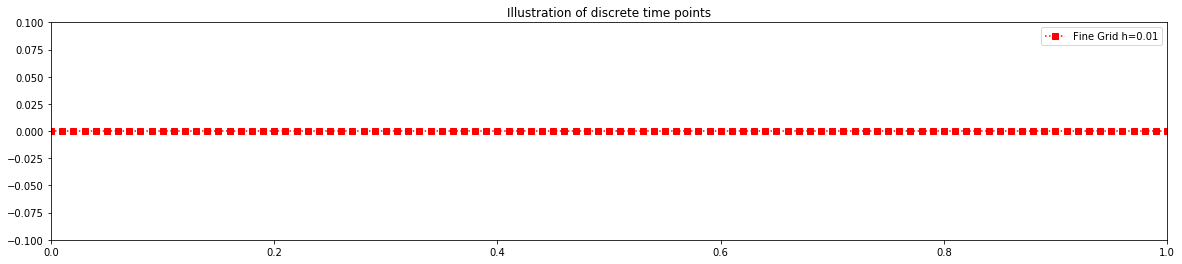

In [36]:
# Start and end of interval
b=4
a=0
# Steps N1=400
N1=400
h1=0.01

x1=np.arange(a,b+h1,h1)

fig = plt.figure(figsize=(20,4))
plt.plot(x1,0*x1,'s:',color='red',label='Fine Grid h=%s'%(h1))

plt.xlim((0,1))
plt.ylim((-0.1,0.1))
plt.title('Illustration of discrete time points')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Analytic (Exact) solution')

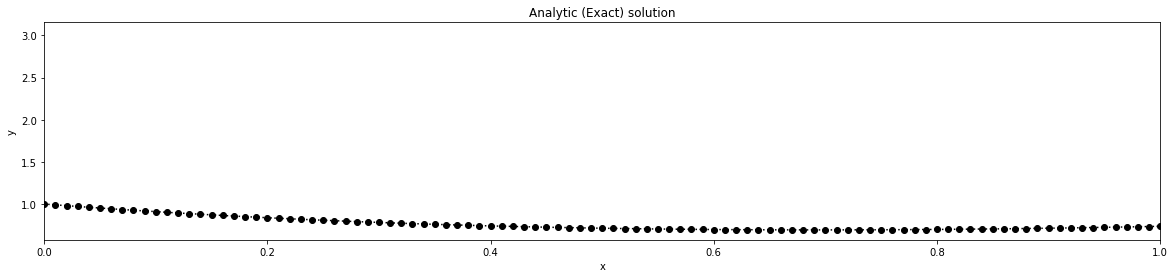

In [37]:
## Analytic Solution y
y=2*np.exp(-x1) + x1 - 1

fig = plt.figure(figsize=(20,4))
plt.plot(x1,y,'o:',color='black')
plt.xlim((0,1))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Analytic (Exact) solution')

## Setting up the inital Conditions
$$ w_{0} = 1 $$

In [51]:
IC=1 # Intial condition
w = np.zeros(N1+1)
w[0]=IC

## Forward Euler
Assuming uniform stepsize  $x_{i+1} − x_{i}$ is replaced by  h, re-arranging the equation gives:
$$ w_{i+1} = w_{i} + hf(x_{i}, w_{i}) $$

This can be read as the future  $w_{i+1} $ can be approximated by the present  $w_{i}$ and the addition of the input to the system  $f(x,y)$ times the time step.

Text(0.5, 1.0, 'Analytic and Euler solution')

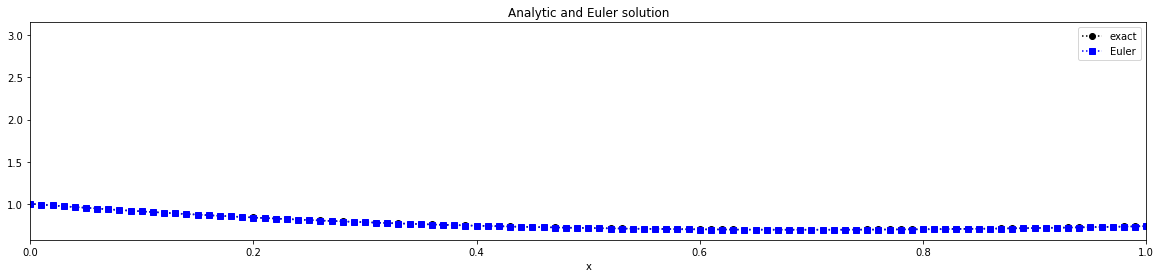

In [39]:

for i in range (0,N1):
    w[i+1]=w[i]+h1*myfun_xy(x1[i], w[i])

fig = plt.figure(figsize=(20,4))
plt.plot(x1,y,'o:',color='black',label='exact')
plt.plot(x1,w,'s:',color='blue',label='Euler')
plt.xlim((0,1))
plt.xlabel('x')
plt.legend(loc='best')
plt.title('Analytic and Euler solution')

## Error
With a numerical solution there are two types of error:
1. local truncation error at one time step
2. global error which is the propogation of the local error

### Derivation of Euler Local truncation error
The left hand side of a IVP $\frac{dy}{dx}$ is approoximated by the Taylors theorem expand about a point $x_{0}$ giving:

$$ y(x_{1}) = y(x_{0}) + (x_{1} - x_{0})y'(x_{0}) + \frac{(x_{1} - x_{0})^2}{2!} y''(\zeta), \ \ \ \zeta \in[x_{0}, x_{1}].$$

Rearraging and letting $h = t_{1}-t_{0}$ the equation becomes:
$$ y'(x_{0}) = \frac{y(x_{1})-y(x_{0})}{h} \ - \frac{h}{2}y''(\zeta)$$

From this the local truncation error is:
$$\tau y'(x_{0}) \leq \frac{h}{2}M $$

### Derivation of Euler Local truncation error 
In most cases y is unknown but in our example problem there is an exact solution which can be used to estimate the local truncation:
$$ y'(t) = -2e^{-x} + 1$$
$$ y''(t) = 2e^{-x}$$

From this a maximum upper limit can be calculated for $y''$ on the interval  $[x_{0},x_{1}] = [0,0.01]$ 
$$ y''(0.01) = 2e^{-0.01} = 1.98 = M$$
$$ \tau = \frac{h}{2}1.98 = 0.0099$$

The plot below shows the exact local truncation error $\lvert y -w \rvert$ (red triangle) and the upper limit of the Truncation error (black v) for the first two time points $x_{0}$ and $x_{1}$.
 .

Text(0.5, 1.0, 'Local Truncation Error')

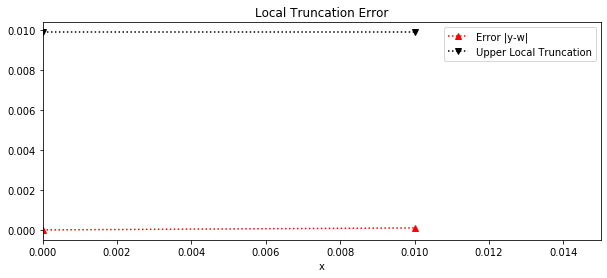

In [40]:
fig = plt.figure(figsize=(10,4))
plt.plot(x1[0:2],np.abs(w[0:2]-y[0:2]),'^:'
         ,color='red',label='Error |y-w|')
plt.plot(x1[0:2],0.01*1.98/2*np.ones(2),'v:'
         ,color='black',label='Upper Local Truncation')
plt.xlim((0,.015))
plt.xlabel('x')
plt.legend(loc='best')
plt.title('Local Truncation Error')

## Global Error
The error does not stay constant accross the time this is illustrated in the figure below DE equation. The actual error (red triangles) increases and decreases over time while the local truncation error (black v) remains constant.

Text(0.5, 1.0, 'Why Local Truncation does not extend to global')

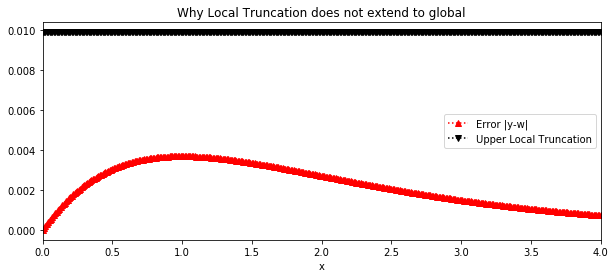

In [42]:
fig = plt.figure(figsize=(10,4))
plt.plot(x1,np.abs(w-y),'^:',color='red',label='Error |y-w|')
plt.plot(x1,0.01*1.98/2*np.ones(N1+1),'v:',color='black',label='Upper Local Truncation')
plt.xlim((0,4))
plt.xlabel('x')
plt.legend(loc='best')
plt.title('Why Local Truncation does not extend to global')

## Theorems
To theorem below proves an upper limit of the global truncation error.

### Euler Global Error
#### Theorem Global Error
Suppose $f$ is continuous and satisfies a Lipschitz Condition with constant L on $D = \lbrace (x,y)| a\leq x \leq b,−\infty < y < \infty \rbrace$ and that a constant M exists with the property that
$$ \lvert y''(x) \rvert \leq M $$
Let $y(x)$ denote the unique solution of the Initial Value Problem
$$ y'= f(x,y)  \ \ a \leq x \leq b \ \ y(a) = \alpha $$

and $w_{0}, w_{1},...,w_{N}$ be the approx generated by the Euler method for some positive integer N. Then for  i=0,1,...,N
$$ \lvert y(x_{i}) - w_{i} \rvert \leq \frac{Mh}{2L}\lvert e^{L(x_{i} - \alpha)} - 1 \rvert $$

### Theorems about Ordinary Differential Equations
#### Definition

A function  $f(x,y)$ is said to satisfy a Lipschitz Condition in the variable $y$ on the set  $ D \subset \Re^2 $ if a constant  L>0 exist with the property that 
$$ \lvert f(x, y_{1}) - f(x, y_{2}) \rvert < \lvert y_{1} - y_{2} \rvert $$ 

whenever  $(x,y_{1}),(x,y_{2}) \in D$ . The constant L is call the Lipschitz Condition of  $f$.

Theorem Suppose $f(x,y)$ is defined on a convex set $ D \subset \Re^2 $. If a constant  L>0 exists with
$$ \bracevert \frac{\partial f(x,y)}{\partial y}\bracevert \leq L$$

 
then $f$ satisfies a Lipschitz Condition an D in the variable y with Lipschitz constant L.

## Global truncation error 
For the population equation specific values  L and M can be calculated. In this case  $f(x,y)=x - y$ is continuous and satisfies a Lipschitz Condition with constant
$$ \bracevert \frac{\partial f(x,y)}{\partial y}\bracevert \leq L$$
$$ \bracevert \frac{\partial (x - y)}{\partial y}\bracevert \leq  1 = L$$

on $D={(x,y)|0\leq x \leq 4, \ \ 1<y<3.0366}$ and that a constant M exists with the property that
$$ \bracevert y''(x) \bracevert \leq M $$
$$ \bracevert y''(x) \bracevert = 2e^{-1x0} \leq 2e^{-0} = 2 $$


Let $y(x)$ denote the unique solution of the Initial Value Problem

$$ y' = x -y \ \ 0 \leq x \leq 4 \ \ y(0) = 1 $$

and $w_{0},w_{1},...,w_{N}$ be the approx generated by the Euler method for some positive integer N. Then for  i=0,1,...,N
$$ \bracevert y(x_{i}) - w_{i} \bracevert \leq \frac{2h}{2x1} \bracevert e^{1(x_{i} - 0)} -1 \bracevert $$

 
The figure below shows the exact error $y−w$ in red triangles and the upper global error in black x's.



Text(0.5, 1.0, 'Global Truncation Error')

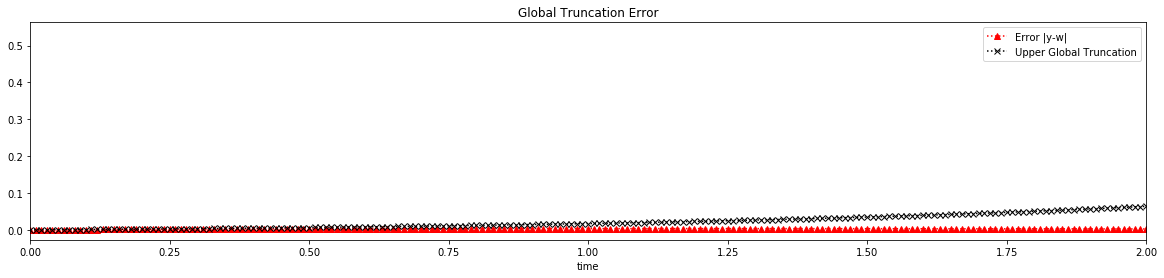

In [45]:
fig = plt.figure(figsize=(20,4))
plt.plot(x1,np.abs(w-y),'^:'
         ,color='red',label='Error |y-w|')
plt.plot(x1,0.01*1*(np.exp(1*x1)-1),'x:'
         ,color='black',label='Upper Global Truncation')
plt.xlim((0,2))
plt.xlabel('time')
plt.legend(loc='best')
plt.title('Global Truncation Error')

In [50]:
table = ListTable()
table.append(['x', 'w','Exact','Error'])
tableSize = 10
for i in range (0,tableSize+1):
    table.append([round(x1[i],3), round(w[i],3), round(y[i],3),
                  round(abs(y[i]-w[i]),8)])
    
table.append(['Max',' ' ,' ' 
              , ' ',
              round(max(abs(y-w)),8)])
table

x,w,Exact,Error
0.0,1.0,1.0,0.0
0.01,0.99,0.99,9.967e-05
0.02,0.98,0.98,0.00019735
0.03,0.971,0.971,0.00029307
0.04,0.961,0.962,0.00038686
0.05,0.952,0.952,0.00047875
0.06,0.943,0.944,0.00056877
0.07,0.934,0.935,0.00065694
0.08,0.925,0.926,0.0007433
0.09,0.917,0.918,0.00082788
